In [16]:
import pandas as pd
import seaborn as sns
import numpy as np

from helper import show_barplot_of_prices, get_room_category, rooms_categories, get_price_category, prices_categories

# Introduction

In this notebook are analyzed 8000+ flats offerings in Berlin, Hamburg and Munich scraped from https://www.immobilienscout24.de/

In [18]:
munich_flats = pd.read_csv("../data/flats/munich.csv", delimiter=';')
hamburg_flats = pd.read_csv("../data/flats/hamburg.csv", delimiter=';')
berlin_flats = pd.read_csv("../data/flats/berlin.csv", delimiter=';')

frames = [munich_flats, hamburg_flats, berlin_flats]
flats = pd.concat(frames)

flats.head()

,city,country,price,size,rooms,latitude,longitude,address
0,munich,DE,800000.0,108.60,4.0,48.154222,11.531517,"Neuhausen, München"
1,munich,DE,800000.0,109.30,3.0,48.154222,11.531517,"Neuhausen, München"
2,munich,DE,1000000.0,153.00,5.0,48.139656,11.587921,"Lehel, München"
3,munich,DE,469000.0,65.26,2.0,48.176160,11.418189,"Osterangerstraße 13, Langwied, München"
4,munich,DE,495000.0,62.80,2.0,48.176160,11.418189,"Osterangerstraße 13, Langwied, München"


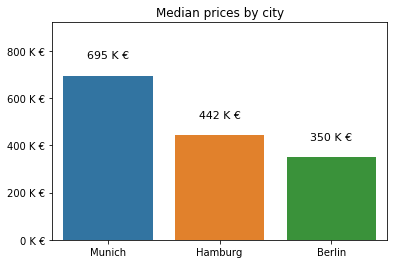

In [3]:
show_barplot_of_prices(x='city', y='price', data=flats, title="Median prices by city")

# Price by number of rooms

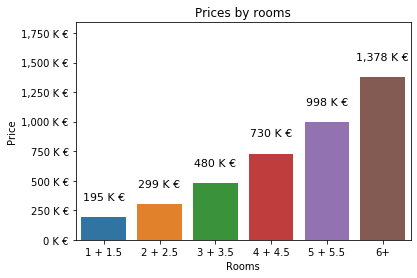

In [19]:
flats["rooms_category"] = flats.apply(lambda row: get_room_category(row['rooms']), axis=1)

show_barplot_of_prices(x='rooms_category', y='price', data=flats, title="Prices by rooms",
                       xlabel="Rooms", ylabel="Price", order=rooms_categories)

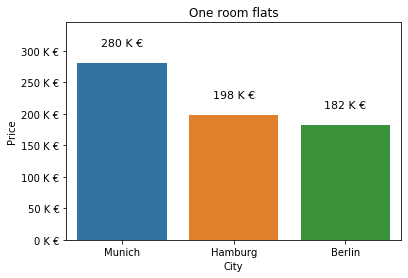

In [20]:
one_rooms_flats = flats[flats['rooms_category'] == rooms_categories[0]]

show_barplot_of_prices(x='city', y='price', data=one_rooms_flats,
                        title="One room flats", xlabel="City", ylabel="Price")

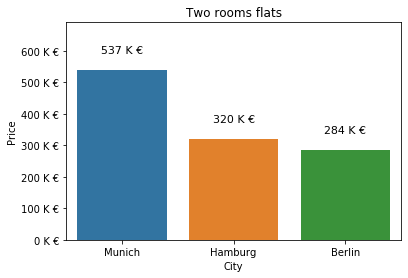

In [21]:
two_rooms_flats = flats[flats['rooms_category'] == rooms_categories[1]]

show_barplot_of_prices(x='city', y='price', data=two_rooms_flats,
                        title="Two rooms flats", xlabel="City", ylabel="Price")

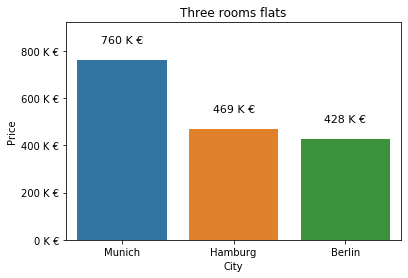

In [7]:
three_rooms_flats = flats[flats['rooms_category'] == rooms_categories[2]]

show_barplot_of_prices(x='city', y='price', data=three_rooms_flats,
                        title="Three rooms flats", xlabel="City", ylabel="Price")

# Price per square meter

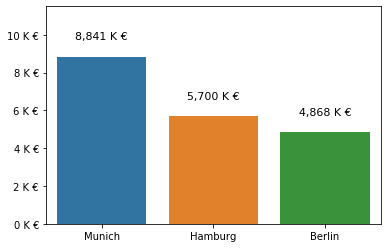

In [8]:
flats["price_per_square"] = flats.apply(lambda row: row['price'] / row['size'] if row['size'] > 1 else 0, axis=1)

show_barplot_of_prices(x='city', y='price_per_square', data=flats)

# Price distribution

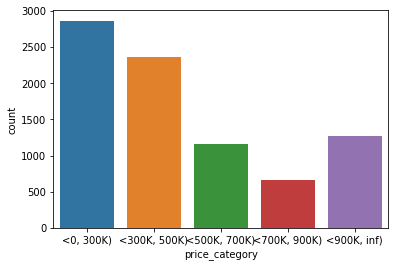

In [9]:
flats["price_category"] = flats.apply(lambda row: get_price_category(row['price']), axis=1)

sns.countplot(x='price_category', data=flats, order=prices_categories)

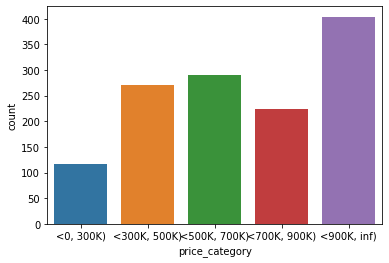

In [13]:
sns.countplot(x='price_category', data=flats[flats['city'] == 'munich'], order=prices_categories)

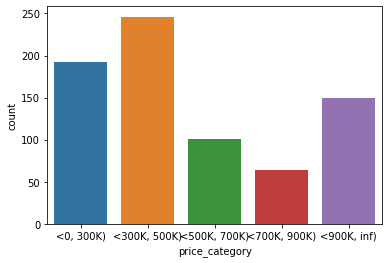

In [14]:
sns.countplot(x='price_category', data=flats[flats['city'] == 'hamburg'], order=prices_categories)

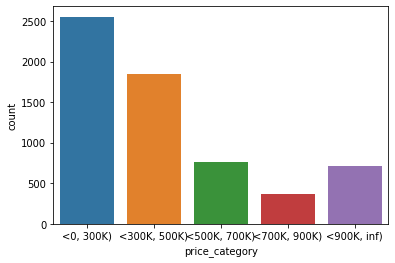

In [15]:
sns.countplot(x='price_category', data=flats[flats['city'] == 'berlin'], order=prices_categories)